# Local parsing


instead of using API - we can use local parsing.

Parsing locally requires the installation of additional dependencies.

Poppler (PDF analysis)

Linux: apt-get install poppler-utils
Mac: brew install poppler
Windows: https://github.com/oschwartz10612/poppler-windows
Tesseract (OCR)

Linux: apt-get install tesseract-ocr
Mac: brew install tesseract
Windows: https://github.com/UB-Mannheim/tesseract/wiki#tesseract-installer-for-windows


Also install following:

!%pip install -qU "unstructured[pdf]"
!%pip install -qU python-magic-bin




In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
file_path = (
    "./docs/layout-parser-paper.pdf"
)

In [3]:
from langchain_unstructured import UnstructuredLoader

loader_local = UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res",
)
docs_local = []
for doc in loader_local.lazy_load():
    docs_local.append(doc)

INFO: NumExpr defaulting to 4 threads.
c:\Code\Github\LangChain-world\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO: pikepdf C++ to Python logger bridge initialized
INFO: Reading PDF for file: ./docs/layout-parser-paper.pdf ...


In [5]:
print(len(docs_local))

181


In [7]:
first_page_docs = [doc for doc in docs_local if doc.metadata.get("page_number") == 1]

for doc in first_page_docs:
    print(doc.page_content)

1 2 0 2 n u J 1 2 ] V C . s
c
[
2
2103.15348v2 arXiv
v
8
4
3
5
1
.
3
0
1
2
:
v
i
X
r
a
LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis
Zejiang Shen! (4), Ruochen Zhang”, Melissa Dell?, Benjamin Charles Germain Lee*, Jacob Carlson’, and Weining Li>
1 Allen Institute for AI shannons@allenai.org 2 Brown University ruochen zhang@brown.edu 3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu 4 University of Washington bcgl@cs.washington.edu 5 University of Waterloo w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusability and simpli

In [8]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image


def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    # Make legend
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()

In [9]:
def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

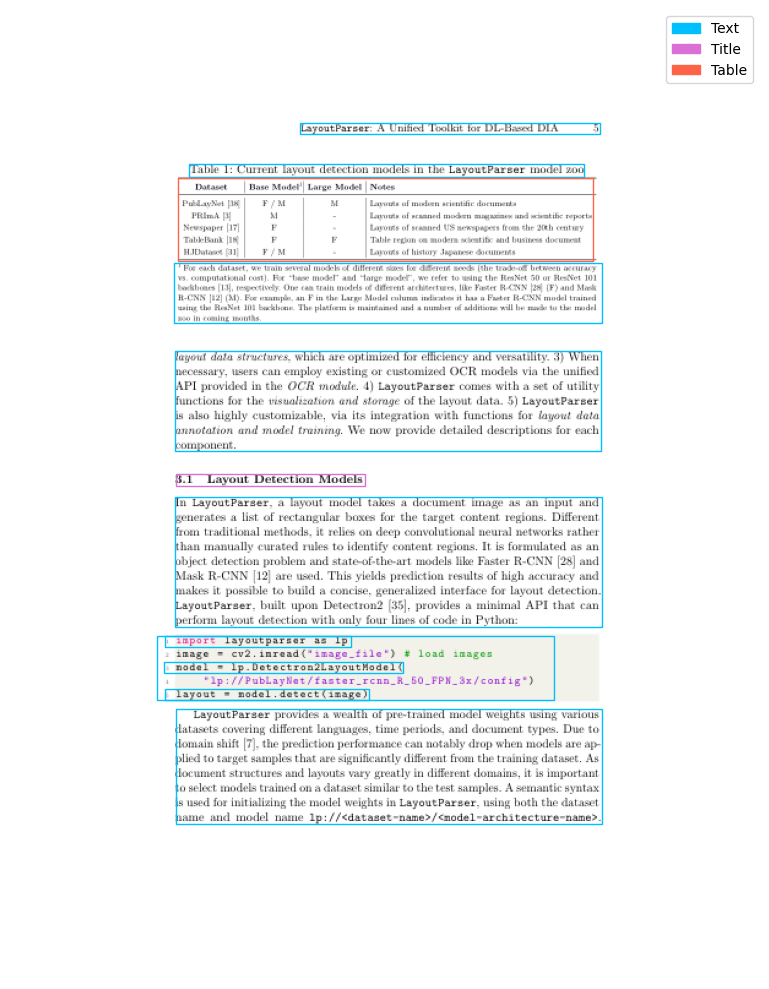

LayoutParser: A Uniﬁed Toolkit for DL-Based DIA

Table 1: Current layout detection models in the LayoutParser model zoo

Dataset Base Model1 Large Model Notes PubLayNet [38] F / M M Layouts of modern scientiﬁc documents PRImA [3] M - Layouts of scanned modern magazines and scientiﬁc reports Newspaper [17] F - Layouts of scanned US newspapers from the 20th century TableBank [18] F F Table region on modern scientiﬁc and business document HJDataset [31] F / M - Layouts of history Japanese documents

1 For each dataset, we train several models of diﬀerent sizes for diﬀerent needs (the trade-oﬀ between accuracy vs. computational cost). For “base model” and “large model”, we refer to using the ResNet 50 or ResNet 101 backbones [13], respectively. One can train models of diﬀerent architectures, like Faster R-CNN [28] (F) and Mask R-CNN [12] (M). For example, an F in the Large Model column indicates it has a Faster R-CNN model trained using the ResNet 101 backbone. The platform is maintained a

In [11]:
render_page(docs_local, 5)

# Rest of the notebook is same as last notebook